# Explore Then Commit (ETC)

In this exercise, we will be experimenting with the Multi-armed bandit problem with the Explore Then Commit (ETC) algorithm.

## Setup

Consider an unstructured bandit problem. Suppose that we have $k$ arms, each with random reward at time $t$ given by $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t]$ is drawn from an i.i.d. standard Gaussian distribution. Note that we only require $\epsilon[t]$ to be sub-Gaussian for the analysis to go through.

The following code should be implemented to capture this setup.

# Reward function

Question: Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg', return $k$- dimensional vector 'rew' such that $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t] \sim \mathcal{N}(0,I)$ where $I$ is the identity matrix of size $k \times k$.

In [ ]:
def get_reward(avg):

  # Number of arms
  k = len(avg)

  # Draw e[t] from N(0, I) where I is the identity matrix of size k
  epsilon = np.random.normal(0, 1, k)

  # Calculate rew[t] = avg[t] + ε[t] for each arm
  rew = avg + epsilon

  return rew


## Algorithm review


Recall there are three parameters of interest in the ETC algoritm: $(n, k, m),$ where $n$ is the time horizon, $k$ is the number of arms and $m$ is an algorithm parameter. Please refer to the lecture notes and the text book for details.

The parameter to set: the exploration time m\*k

1. Choose each arm in the round-robin fashion until each arm is played m times
2. Compute the empirical reward estimate for each arm
3. Choose the best arm (according to the empirical reward estimate) until the end of the game

## Goal of this exercise

Implement the following using the template provided below. Please use the variable names suggested in the comments.

1. Basic ETC algorithm implementation
2. Plot the expected cumulative regret of ETC vs. horizon ($n$).



# Import Dependencies

In [ ]:
import numpy as np
import pickle

##ETC
Question:

Implement ETC using the skeleton below. The initialization part is done. Fill out the rest of the skeleton.

In [ ]:
class ETC():
  def __init__(self, avg, m): ## Initialization

    self.means = avg
    self.m = m
    self.num_arms = avg.size
    self.best_arm = np.argmax(avg)
    self.restart()

    ## variable names (most are self explanatory)
    ## self.num_arms is the number of arms (k)
    ## self.means[arm] is the vector of true means of the arms
    ## self.time is the current time index (this is t in the description at the top of this page)
    ## self.best_arm is the best arm given the true mean rewards
    ## self.cum_reg is the cumulative regret
    ## self.emp_means[arm] is the vector of empirical means of arms
    ## self.num_pulls[arm] is the vector of number of times that arm k has been pulled


  def restart(self): ## Restart the algorithm: Reset the time index to zero (done), the values of the empirical means,
                     ## number of pulls, and cumulative regret to zero.
    self.time = 0

    # the values of the empirical means
    self.emp_means = np.zeros(self.num_arms)

    # the number of pulls
    self.num_pulls = np.zeros(self.num_arms, dtype=int)

    # Initialize cumulative regrets as a zero-length array, it will grow dynamically
    self.cum_reg = np.array([])

  def get_best_arm(self): ## For each time index, find the best arm according to ETC.

    # this checks if still in exploration phase (true only if the current time step is less than the total number of exploration stpes -- number of times arms to be played x no. of arms)
    if self.time < self.m * self.num_arms:
      return self.time % self.num_arms
    else:
      # commit phase - get the max
      return np.argmax(self.emp_means)


  def update_stats(self, rew, arm): ## Update the empirical means, the number of pulls, and increment the time index

    # the number of pulls - has to be before to ensure the calculation uses the most up-to-date denominator
    self.num_pulls[arm] += 1

    # update the empirical means
    self.emp_means[arm] += (rew - self.emp_means[arm]) / self.num_pulls[arm]

    # increment the time index
    self.time += 1


  def update_reg(self,rew,arm): ## Update the cumulative regret - modified the signature.. no point in passing the entire vector

    optimal_reward = self.means[self.best_arm]
    current_regret = optimal_reward - rew
    # if cum_reg is empty, append current_regret, else add the previous total plus current_regret
    if self.cum_reg.size == 0:
      self.cum_reg = np.append(self.cum_reg, current_regret)
    else:
      self.cum_reg = np.append(self.cum_reg, self.cum_reg[-1] + current_regret)


  def iterate(self, rew_vec): ## Iterate the algorithm
    arm = self.get_best_arm()

    #print("arm (type):", type(arm), "arm (value):", arm)
    #print("rew_vec (type):", type(rew_vec), "rew_vec (shape):", rew_vec.shape)

    rew = rew_vec[arm]
    self.update_stats(rew, arm)
    self.update_reg(rew, arm)



# Experiment Function
The following code runs the ETC algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time horizon.

In [ ]:
def run_algo(avg, m, num_iter, num_inst):

    reg = np.zeros((num_inst, num_iter))

    algo = ETC(avg, m)

    for j in range(num_inst):
        algo.restart()

        if (j+1)%10 == 0:
            print('Instance number = ', j+1)

        for t in range(num_iter):
            rew_vec = get_reward(avg)
            algo.iterate(rew_vec)
            #reg[j, t] = algo.cum_reg

        reg[j,:]= np.asarray(algo.cum_reg)

    return reg

# Initializations
Use the following to initialize your algorithm. The value of $k$ is implicitly set to $6$ in the initialization below. (You can change the number of arms $k$ and their values in the avg vector in any manner to test your algorithm. This vector contains the actual mean rewards). $m$ below has been set to $1$ as a default. Update this to reflect the correct initialization.

In [33]:
import math
avg = np.asarray([0.6, 0.9, 0.95, 0.8, 0.7, 0.3])
num_iter,num_inst = int(5e4),30

# book https://tor-lattimore.com/downloads/book/book.pdf - equation 6.5 - page 93
# m = max(1, 4/delta^2 * log(n*delta^2)/4)

# the minimum gap Delta is the difference between the highest mean and the second highest mean
Delta = np.max(avg) - sorted(avg)[-2]

print(Delta)
# Implementing the provided formula for m
m = max(1, int(np.ceil(4 / Delta**2 * np.log(num_iter * Delta**2 / 4))))



0.04999999999999993


# Run Experiment

In [34]:
reg = run_algo(avg, m, num_iter, num_inst)

Instance number =  10
Instance number =  20
Instance number =  30


## Plotting the Results

Questions:

1 - Compute the average regret over the number of instances and plot it against the horizon. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with ETC'.

2 - Plot a vertical line at $x = len(avg) * m $.

[[ 1.94433940e-01 -3.70357798e-01 -6.37911352e-01 ...  7.86152830e+03
   7.86147260e+03  7.86129499e+03]
 [ 9.53034937e-02  7.80939945e-01 -2.45645328e-01 ...  7.93831123e+03
   7.93882798e+03  7.93850509e+03]
 [ 1.69453873e+00  1.82211044e+00  2.92536717e+00 ...  7.90835702e+03
   7.90774014e+03  7.90769546e+03]
 ...
 [ 7.16817247e-01  7.29680087e-01  1.18371642e+00 ...  7.92612162e+03
   7.92585373e+03  7.92487807e+03]
 [ 1.20687299e+00  8.47563819e-01  2.18910349e-01 ...  8.05056297e+03
   8.05238222e+03  8.05228437e+03]
 [ 5.28405988e-01  8.23555707e-01  1.13020312e-01 ...  7.80455508e+03
   7.80413759e+03  7.80263666e+03]]


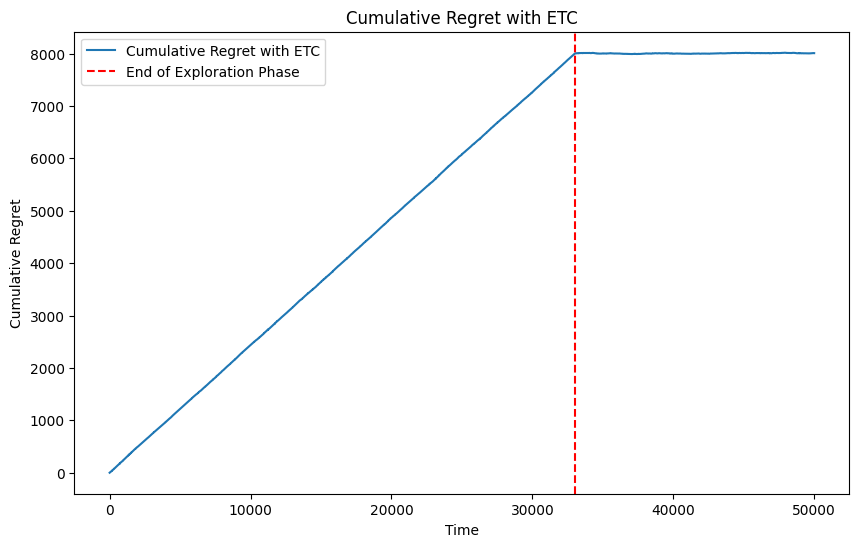

In [35]:
import numpy as np
import matplotlib.pyplot as plt

print(reg)
# Compute the average cumulative regret over the number of instances
avg_cum_reg = np.mean(reg, axis=0)

# Time/horizon array
time = np.arange(num_iter)

# Plot the average cumulative regret
plt.figure(figsize=(10, 6))
plt.plot(time, avg_cum_reg, label='Cumulative Regret with ETC')
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with ETC')

# Plot a vertical line at x=len(avg) * m to mark the end of the exploration phase
plt.axvline(x=len(avg) * m, color='r', linestyle='--', label='End of Exploration Phase')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


The plot shows the cumulative regret of an Explore Then Commit (ETC) algorithm over time, as it interacts with a multi-armed bandit problem.

X-Axis (Time): Represents the number of iterations or time steps the algorithm has taken. It spans from 0 to 50,000 in this case.

Y-Axis (Cumulative Regret): Shows the total regret accumulated over time. Regret is the difference in reward between choosing the current arm and the best possible arm. If the algorithm were choosing the best arm at every time step, the cumulative regret would be 0. As time increases, any suboptimal choices made by the algorithm add to the cumulative regret.

Blue Line (Cumulative Regret with ETC): Indicates the regret that has been accumulated as the ETC algorithm operates. Initially, this regret increases relatively quickly, which is typical for the exploration phase where the algorithm is trying different arms to estimate their rewards. After exploration, the algorithm commits to what it believes to be the best arm, and the regret increases at a slower rate.

Red Dashed Vertical Line (End of Exploration Phase): This line marks the point at which the algorithm switches from the exploration phase to the commitment phase. Before this line, the algorithm was exploring, trying each arm a specified number of times (m times each arm). After this line, the algorithm commits to the arm it has determined to be the best based on the exploration data. Theoretically, this should result in a slower increase in regret as the algorithm should now be choosing the best or near-best option more often.

I decided to keep the run_algo function as it was provided and ended up changing the cum_reg to be an array. Another solution was to change the run_algo function to store the regret at each step. This other solution can be found here: https://colab.research.google.com/drive/1AC_PsGjh1tqDW8mXogk_j99nNRQ66OAw#scrollTo=7kknXg3sGk6A



**Adding below the code for the Doubling trick:**


In [148]:
#ETC Doubling
class ETCDoubling():

 def __init__(self, avg, m): ## Initialization

  self.means = avg
  self.initial_m = m # Keep track of the initial exploration parameter
  self.m = m
  self.num_arms = avg.size
  self.best_arm = np.argmax(avg)
  self.restart(reset_m=False) # Initial setup without resetting m

 def restart(self, reset_m=True): ## Restart the algorithm: Reset the time index to zero (done), the values of the empirical means,
  if reset_m:
    self.m = self.initial_m
  self.time = 0
  self.emp_means = np.zeros(self.num_arms)
  self.num_pulls = np.zeros(self.num_arms, dtype=int)
  self.cum_reg = np.array([])

 def get_best_arm(self): ## For each time index, find the best arm according to ETC.

  # this checks if still in exploration phase (true only if the current time step is less than the total number of exploration stpes -- number of times arms to be played x no. of arms)
  if self.time < self.m * self.num_arms:
   return self.time % self.num_arms
  else:
   # commit phase - get the max
   return np.argmax(self.emp_means)


 def update_stats(self, rew, arm): ## Update the empirical means, the number of pulls, and increment the time index

  # the number of pulls - has to be before to ensure the calculation uses the most up-to-date denominator
  self.num_pulls[arm] += 1

  # update the empirical means
  self.emp_means[arm] += (rew - self.emp_means[arm]) / self.num_pulls[arm]

  # increment the time index
  self.time += 1


 def update_reg(self,rew,arm): ## Update the cumulative regret - modified the signature.. no point in passing the entire vector

  optimal_reward = self.means[self.best_arm]
  current_regret = optimal_reward - rew
  # if cum_reg is empty, append current_regret, else add the previous total plus current_regret
  if self.cum_reg.size == 0:
   self.cum_reg = np.append(self.cum_reg, current_regret)
  else:
   self.cum_reg = np.append(self.cum_reg, self.cum_reg[-1] + current_regret)


 def iterate(self, rew_vec): ## Iterate the algorithm
  arm = self.get_best_arm()

  #print("arm (type):", type(arm), "arm (value):", arm)
  #print("rew_vec (type):", type(rew_vec), "rew_vec (shape):", rew_vec.shape)

  rew = rew_vec[arm]
  self.update_stats(rew, arm)
  self.update_reg(rew, arm)

  if self.time % (self.m * self.num_arms) == 0 and self.time > 0:
    self.m *= 2  # Double the exploration parameter only when the exploration phase cycle completes
    print(f"Doubling down: New m is {self.m}")


In [149]:
def run_algo_doubling(avg, m, num_iter, num_inst):
 reg = np.zeros((num_inst, num_iter))


 m_init = m
 for j in range(num_inst):
  m = m_init
  algo = ETCDoubling(avg, m)
  # Restart the algorithm with resetting 'm' to its initial value for each instance
  print(f"Instance {j+1}: Initial m in ETCDonlingDown object = {algo.m}")  # Verify initial m


  if (j + 1) % 10 == 0:
    print('Instance number = ', j + 1)

  for t in range(num_iter):
    rew_vec = get_reward(avg)
    algo.iterate(rew_vec)
    # Handle variable lengths of algo.cum_reg
    reg_len = len(algo.cum_reg)
    reg[j, :reg_len] = algo.cum_reg

    # If algo.cum_reg is shorter than num_iter, fill the rest with the last value of algo.cum_reg
    if reg_len < num_iter:
      reg[j, reg_len:] = algo.cum_reg[-1]

 return reg

In [150]:
import math
import numpy as np

avg = np.asarray([0.6, 0.9, 0.95, 0.8, 0.7, 0.3])
num_iter,num_inst = int(1e4),30

# book https://tor-lattimore.com/downloads/book/book.pdf - equation 6.5 - page 93
# m = max(1, 4/delta^2 * log(n*delta^2)/4)

# the minimum gap Delta is the difference between the highest mean and the second highest mean
Delta = np.max(avg) - sorted(avg)[-2]

print(Delta)
# Implementing the provided formula for m
m = max(1, int(np.ceil(4 / Delta**2 * np.log(num_iter * Delta**2 / 4))))
m  = 4
print(m)



0.04999999999999993
4


In [151]:
reg = run_algo_doubling(avg, m, num_iter, num_inst)

Instance 1: Initial m in ETCDonlingDown object = 4
Doubling down: New m is 8
Doubling down: New m is 16
Doubling down: New m is 32
Doubling down: New m is 64
Doubling down: New m is 128
Doubling down: New m is 256
Doubling down: New m is 512
Doubling down: New m is 1024
Doubling down: New m is 2048
Instance 2: Initial m in ETCDonlingDown object = 4
Doubling down: New m is 8
Doubling down: New m is 16
Doubling down: New m is 32
Doubling down: New m is 64
Doubling down: New m is 128
Doubling down: New m is 256
Doubling down: New m is 512
Doubling down: New m is 1024
Doubling down: New m is 2048
Instance 3: Initial m in ETCDonlingDown object = 4
Doubling down: New m is 8
Doubling down: New m is 16
Doubling down: New m is 32
Doubling down: New m is 64
Doubling down: New m is 128
Doubling down: New m is 256
Doubling down: New m is 512
Doubling down: New m is 1024
Doubling down: New m is 2048
Instance 4: Initial m in ETCDonlingDown object = 4
Doubling down: New m is 8
Doubling down: New m is